# Initialize

In [1]:
import numpy as np
import random
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from io import StringIO
class SEIRModel:
    def __init__(self, population, beta, sigma, gamma):
        self.population = population
        self.beta = beta
        self.sigma = sigma
        self.gamma = gamma
        self.s = 100 
        self.e = 10
        self.i = 0
        self.r = 0

    def step(self):
        new_infections = self.beta * self.s * self.i / self.population
        new_exposed = new_infections
        new_recovered = self.gamma * self.i
        self.s -= new_infections
        self.e += new_exposed
        self.i += new_infections - new_recovered
        self.r += new_recovered

    def get_infected(self):
        return int(self.i)

    def __call__(self, y, t, N, beta, sigma, gamma):
        S, E, I, R = y
        dSdt = -beta * S * I / N
        dEdt = beta * S * I / N - sigma * E
        dIdt = sigma * E - gamma * I
        dRdt = gamma * I
        return dSdt, dEdt, dIdt, dRdt
    
def load_df(data_name: str) -> pd.DataFrame:
    path = f"nb_datasets/{data_name}"

    df:pd.DataFrame = pd.read_csv(path)

    # ensure sort by date
    df['date'] = pd.to_datetime(df['date'], dayfirst=True, format='%d/%m/%Y')
    df_sorted: pd.DataFrame = df.sort_values(by='date')

    df_sorted = df.sort_values("barangay_Res")
    keep_cols = ["date", "barangay_Res", "count_Exposed", "count_Infectious", "count_Recovered"]
    main_df: pd.DataFrame = df_sorted[df_sorted.columns.intersection(keep_cols)]
    
    return main_df


In [4]:

# Input data as a string
data = """
Barangay	Population percentage (2020)	Population (2020)	Population (2015)	Change (2015‑2020)	Annual Population Growth Rate (2015‑2020)
Bagong Silang	1.76%	5,736	5,539	3.56%	0.74%
Calendola	1.16%	3,797	4,728	-19.69%	-4.51%
Chrysanthemum	3.81%	12,433	10,482	18.61%	3.66%
Cuyab	6.57%	21,422	21,731	-1.42%	-0.30%
Estrella	2.46%	8,025	7,478	7.31%	1.50%
Fatima	1.99%	6,491	8,704	-25.43%	-5.99%
G.S.I.S.	0.87%	2,828	2,867	-1.36%	-0.29%
Landayan	10.19%	33,235	31,407	5.82%	1.20%
Langgam	9.49%	30,946	29,625	4.46%	0.92%
Laram	2.00%	6,536	6,285	3.99%	0.83%
Magsaysay	3.92%	12,793	12,172	5.10%	1.05%
Maharlika	1.71%	5,580	6,343	-12.03%	-2.66%
Narra	0.70%	2,297	2,429	-5.43%	-1.17%
Nueva	1.31%	4,286	4,967	-13.71%	-3.06%
Pacita 1	6.93%	22,581	20,362	10.90%	2.20%
Pacita 2	3.68%	11,993	12,811	-6.39%	-1.38%
Poblacion	1.77%	5,771	5,890	-2.02%	-0.43%
Riverside	0.93%	3,028	3,226	-6.14%	-1.32%
Rosario	1.81%	5,911	5,613	5.31%	1.09%
Sampaguita Village	1.52%	4,941	5,733	-13.81%	-3.08%
San Antonio	18.21%	59,368	61,428	-3.35%	-0.72%
San Lorenzo Ruiz	1.78%	5,800	5,073	14.33%	2.86%
San Roque	2.20%	7,161	7,011	2.14%	0.45%
San Vicente	8.45%	27,561	26,129	5.48%	1.13%
Santo Nino	1.19%	3,892	4,172	-6.71%	-1.45%
United Bayanihan	1.65%	5,385	7,086	-24.01%	-5.61%
United Better Living	1.90%	6,204	6,518	-4.82%	-1.03%
"""

## Check if names are correct
# Create a DataFrame
df = pd.read_csv(StringIO(data), sep="\t")
df["Barangay"] = df["Barangay"].str.upper()

# Clean up the 'Population (2020)' column to remove commas and convert to integers
df["Population (2020)"] = df["Population (2020)"].str.replace(",", "").astype(int)

# Create a dictionary with Barangay as keys and Population (2020) as values
barangay_population_dict = df.set_index("Barangay")["Population (2020)"].to_dict()

# Print the dictionary
print(barangay_population_dict)


df = load_df("CITY_OF_SAN_PEDRO_processed.csv")

name_list = df["barangay_Res"].unique().tolist()

print(f"br_list = {len(barangay_population_dict)} \nbr_df = {len(name_list)}")

for b_name in barangay_population_dict:
    if b_name not in name_list:
        print(f"Wrong: {b_name}")
        

for brgy_name, brgy_pop in barangay_population_dict.items():
  print(f"{brgy_name}: {brgy_pop}")        

{'BAGONG SILANG': 5736, 'CALENDOLA': 3797, 'CHRYSANTHEMUM': 12433, 'CUYAB': 21422, 'ESTRELLA': 8025, 'FATIMA': 6491, 'G.S.I.S.': 2828, 'LANDAYAN': 33235, 'LANGGAM': 30946, 'LARAM': 6536, 'MAGSAYSAY': 12793, 'MAHARLIKA': 5580, 'NARRA': 2297, 'NUEVA': 4286, 'PACITA 1': 22581, 'PACITA 2': 11993, 'POBLACION': 5771, 'RIVERSIDE': 3028, 'ROSARIO': 5911, 'SAMPAGUITA VILLAGE': 4941, 'SAN ANTONIO': 59368, 'SAN LORENZO RUIZ': 5800, 'SAN ROQUE': 7161, 'SAN VICENTE': 27561, 'SANTO NINO': 3892, 'UNITED BAYANIHAN': 5385, 'UNITED BETTER LIVING': 6204}
br_list = 27 
br_df = 27
BAGONG SILANG: 5736
CALENDOLA: 3797
CHRYSANTHEMUM: 12433
CUYAB: 21422
ESTRELLA: 8025
FATIMA: 6491
G.S.I.S.: 2828
LANDAYAN: 33235
LANGGAM: 30946
LARAM: 6536
MAGSAYSAY: 12793
MAHARLIKA: 5580
NARRA: 2297
NUEVA: 4286
PACITA 1: 22581
PACITA 2: 11993
POBLACION: 5771
RIVERSIDE: 3028
ROSARIO: 5911
SAMPAGUITA VILLAGE: 4941
SAN ANTONIO: 59368
SAN LORENZO RUIZ: 5800
SAN ROQUE: 7161
SAN VICENTE: 27561
SANTO NINO: 3892
UNITED BAYANIHAN: 5385


# Sim Anneal Code

In [18]:
# Simulate SEIR model
def simulate_seir(beta, sigma, gamma, y0, t, n):
    N = n
    seir_model = SEIRModel(N, beta, sigma, gamma)
    
    # Solve ODEs for SEIR
    result = odeint(seir_model, y0, t, args=(N, beta, sigma, gamma))
    S, E, I, R = result.T
    
    return S, E, I, R
      

# Objective function
def objective_function(params, observed_data, initial_conditions, time_points, n):
    beta, sigma, gamma = params

    # Simulate the SEIR model with given parameters
    s, predicted_E, predicted_I, predicted_R = simulate_seir(beta, sigma, gamma, initial_conditions, time_points, n)
    
    # Split observed data into compartments
    observed_E, observed_I, observed_R = observed_data[:, 0], observed_data[:, 1], observed_data[:, 2]
    
    # Calculate metrics for each compartment
    metrics = {}
    r2_dict= {}
    mae_dict = {}
    rmse_dict = {}
    
    for compartment, observed, predicted in zip(
        ["E", "I", "R"],
        [observed_E, observed_I, observed_R],
        [predicted_E, predicted_I, predicted_R]
        ):
    
        r2 = r2_score(observed, predicted)
        mae = mean_absolute_error(observed, predicted)
        rmse = np.sqrt(mean_squared_error(observed, predicted))

        # Normalize metrics
        r2_normalized = 1 - r2  # Invert R^2 for minimization
        mae_normalized = mae / np.max(observed)  # Scale by max value
        rmse_normalized = rmse / np.max(observed)  # Scale by max value

        # Weighted average for each compartment
        combined_metric = (0.2 * r2_normalized) + (0.4 * mae_normalized) + (0.4 * rmse_normalized)
        metrics[compartment] = combined_metric
        r2_dict[compartment] = r2
        mae_dict[compartment] = mae
        rmse_dict[compartment] = rmse

    # Combine all compartments (average or weighted sum)
    total_metric = np.mean(list(metrics.values()))  # Equal weight to all compartments
    total_r2 = np.mean(list(r2_dict.values()))
    total_mae = np.mean(list(mae_dict.values()))
    total_rmse = np.mean(list(rmse_dict.values()))
    
    return total_metric, total_r2, total_mae, total_rmse


# Simulated Annealing for SEIR parameter tuning
def simulated_annealing_seir(observed_data, initial_conditions, time_points, temp, cooling_rate, max_iter, n):
    # Initial parameter guesses
    current_params = [0.3, 0.2, 0.1]  # Initial guesses for beta, sigma, gamma
    current_cost, current_r2, current_mae, current_rmse = objective_function(current_params, observed_data, initial_conditions, time_points, n)
    best_params = current_params
    best_r2, best_mae, best_rmse = current_r2, current_mae, current_rmse
    best_cost = current_cost
    
    #min_temp = 1e-5 
    initial_temp = temp
    
    for i in range(max_iter):
        # Generate new candidate parameters
        new_params = [param + random.uniform(-0.01, 0.01) for param in current_params]
        new_params = np.clip(new_params, 0, 1)  # Keep parameters in a valid range (0 to 1)        
        
        # Evaluate the new candidate solution
        new_cost, new_r2, new_mae, new_rmse = objective_function(new_params, observed_data, initial_conditions, time_points, n)

        # ADJUST BASED ON METRIC
        # Decide whether to accept the new solution
        if new_cost < current_cost or random.random() < np.exp((current_cost - new_cost) / temp):
            current_params = new_params
            current_cost = new_cost
            
            # Update the best solution found so far
            if new_cost < best_cost:
                best_params = new_params
                best_cost = new_cost
                best_r2, best_mae, best_rmse = new_r2, new_mae, new_rmse

        # Cool down the temperature
        #temp = max(temp * cooling_rate, min_temp)  # Exponential decrease
        #temp = temp - (initial_temp / max_iter)  # Linear decrease
        temp = initial_temp / (1 + cooling_rate * i)  # Logarithmic decrease

    return best_params, best_r2, best_mae, best_rmse

# Run Sim Anneal

In [19]:
'''
- need every barangay name and population
- iterate through every barangay in san pedro
- store best params in dictionary
- show graphs of using optimized params for brgys
- show split for train and test

brgy_dict = { brgy_name: population } # done

params_dict = {
  "brgy1" : {
    "beta" : 0.217,
    "sigma" : 0.217,
    "gamma": 0.217
  },
  "brgy2" : {
    "beta" : 0.217,
    "sigma" : 0.217,
    "gamma": 0.217
  },
  "brgy3" : {
    "beta" : 0.217,
    "sigma" : 0.217,
    "gamma": 0.217
  }

TODO: fix loop to call sim anneal per barangay with their pop
'''

# function for running sim anneal
def run_anneal(brgy_pop, observed_data):
  # Initial parameters

  N = brgy_pop
  I0 = observed_data['count_Infectious'].iloc[0] # Initial infected from data
  E0 = observed_data['count_Exposed'].iloc[0] # Initial exposed cases
  R0 = observed_data['count_Recovered'].iloc[0] # Initial recovered
  S0 = N - I0 - E0 - R0  # Susceptible

  initial_conditions: tuple = [S0, E0, I0, R0]
    
  # Simulated Annealing parameters
  temp = 1500  
  cooling_rate = 0.95
  max_iter = 1500 
  time_points = np.arange(observed_data.shape[0]) # odeint expects an array (vector) of integers.
  
  observed_data = observed_data.to_numpy()
  
  best_params, best_r2, best_mae, best_rmse = simulated_annealing_seir(observed_data, initial_conditions, time_points, temp, cooling_rate, max_iter, N)

  return best_params, best_r2, best_mae, best_rmse

# store best params  
params_dict = dict()
  
# load data
main_df: pd.DataFrame = load_df("CITY_OF_SAN_PEDRO_processed.csv")

# Split data into training and testing
train_data = main_df[(main_df['date'] >= '01/01/2021') & (main_df['date'] <= '07/01/2021')]
test_data = main_df[(main_df['date'] >= '07/02/2021') & (main_df['date'] <= '12/31/2022')]

for brgy_name, brgy_pop in barangay_population_dict.items():
  brgy_data = train_data[train_data["barangay_Res"] == brgy_name]
  
  if brgy_data.empty:
    print(f"Skipping {brgy_name}: No data available.")
    continue

  brgy_data = brgy_data.sort_values(by="date")
  observed_data = brgy_data[["count_Exposed", "count_Infectious", "count_Recovered"]]
  
  # print(observed_data.info())
  
  # print(f"{brgy_name} columns: {observed_data.columns}")
  # print(f" data type: {type(observed_data)}")
  # print(f"number of null: {observed_data.isnull().sum()}")
  
  if observed_data.empty:
    print(f"Skipping {brgy_name}: Observed data is empty.")
    continue
  best_params, best_r2, best_mae, best_rmse = run_anneal(brgy_pop, observed_data)
  o_beta, o_sigma, o_gamma = best_params

  brgy_params = {
      "beta": o_beta,
      "sigma": o_sigma,
      "gamma": o_gamma,
      "r2": best_r2, 
      "mae": best_mae, 
      "rmse": best_rmse
  }
  params_dict[brgy_name] = brgy_params
  # except Exception as e:
  #     print(f"Error processing {brgy_name}: {e}")
  #     continue

print(len(params_dict))
for brgy, vals in params_dict.items():
    print(brgy)
    
    for params in vals:
        print(f"{params}: {vals[params]}")

Skipping SANTO NINO: No data available.
26
BAGONG SILANG
beta: 0.1875922700322008
sigma: 0.1933216444451003
gamma: 0.169782840279635
r2: 0.2757529934926777
mae: 3.5229785636088597
rmse: 4.57204595393568
CALENDOLA
beta: 0.13066737265409903
sigma: 0.23589886014968253
gamma: 0.12070021141495413
r2: -0.3387326653613745
mae: 9.854766300562941
rmse: 11.454524113925325
CHRYSANTHEMUM
beta: 0.23518207401356495
sigma: 0.18306990810867457
gamma: 0.20506134053322722
r2: 0.23426582243171298
mae: 8.710795989401491
rmse: 11.83272312677642
CUYAB
beta: 0.26367742177499237
sigma: 0.1625600098145119
gamma: 0.2549944780908285
r2: 0.02152356882347421
mae: 20.84600397006287
rmse: 25.223056310939143
ESTRELLA
beta: 0.2001836886402378
sigma: 0.23343324942102944
gamma: 0.18718312944437085
r2: 0.029740875096522606
mae: 2.7128840243651564
rmse: 3.254472471470303
FATIMA
beta: 0.26502132094004904
sigma: 0.181589224130292
gamma: 0.24763086221251518
r2: 0.10689775486793196
mae: 8.438854795243655
rmse: 11.831501519032

# Params for each barangay

beta: 0.1875922700322008 
sigma: 0.1933216444451003 
gamma: 0.169782840279635 
r2: -1.0933284220792707 
mae: 6.737603885387164 
rmse: 8.006606119998127


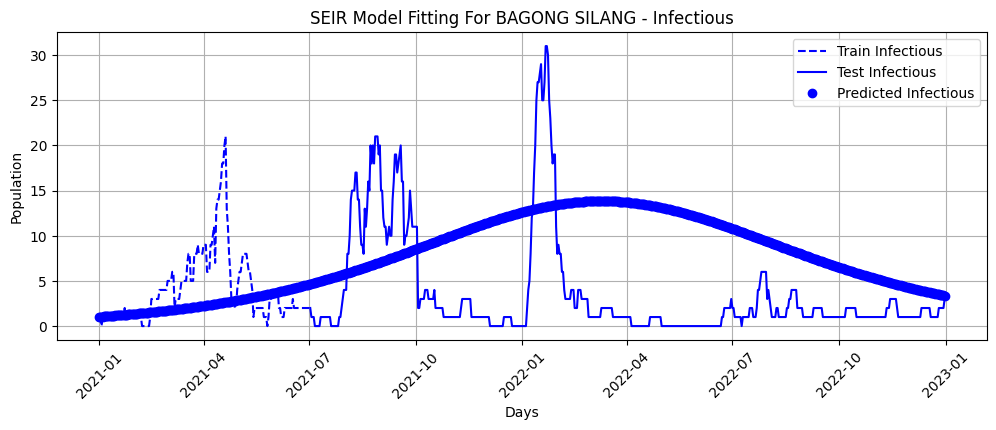

beta: 0.13066737265409903 
sigma: 0.23589886014968253 
gamma: 0.12070021141495413 
r2: 0.09982002858160044 
mae: 4.643224330778443 
rmse: 6.445323303885974


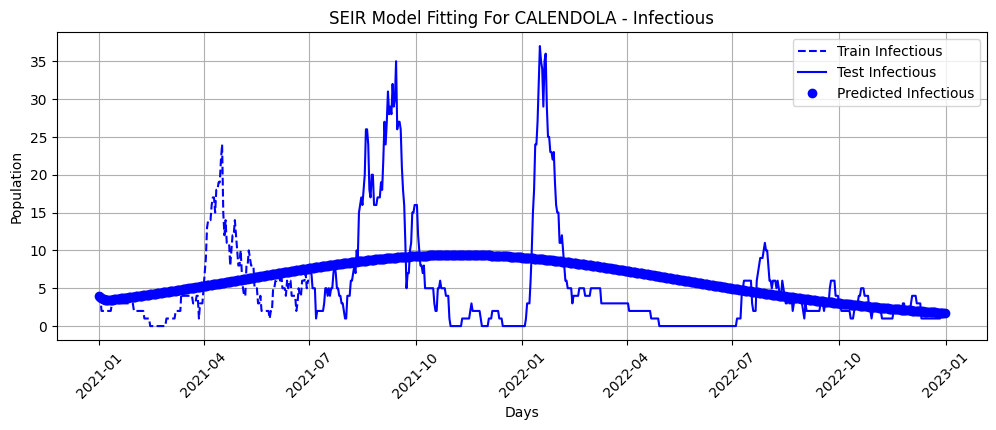

beta: 0.23518207401356495 
sigma: 0.18306990810867457 
gamma: 0.20506134053322722 
r2: -1.3571190410698062 
mae: 13.769913549655413 
rmse: 19.820628635766788


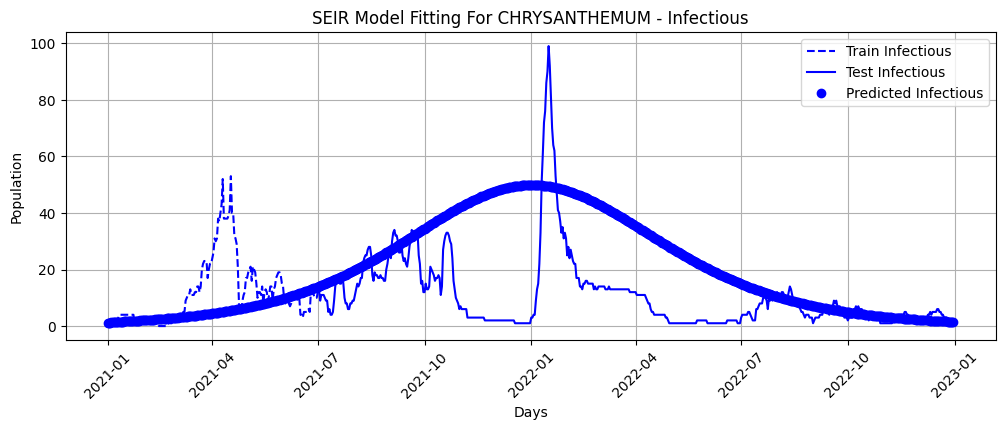

beta: 0.26367742177499237 
sigma: 0.1625600098145119 
gamma: 0.2549944780908285 
r2: -0.13623995081399842 
mae: 9.753761672802435 
rmse: 17.195483539697115


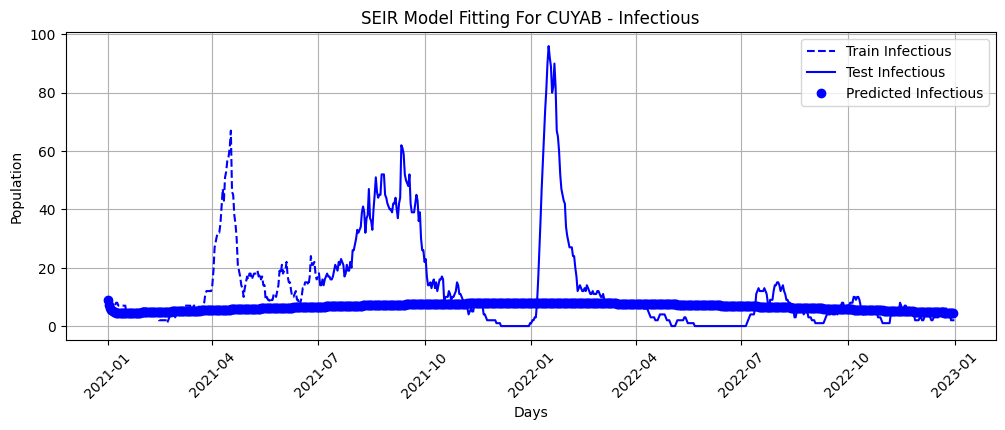

beta: 0.2001836886402378 
sigma: 0.23343324942102944 
gamma: 0.18718312944437085 
r2: -0.9081751642598765 
mae: 5.140083745958911 
rmse: 6.716439850966902


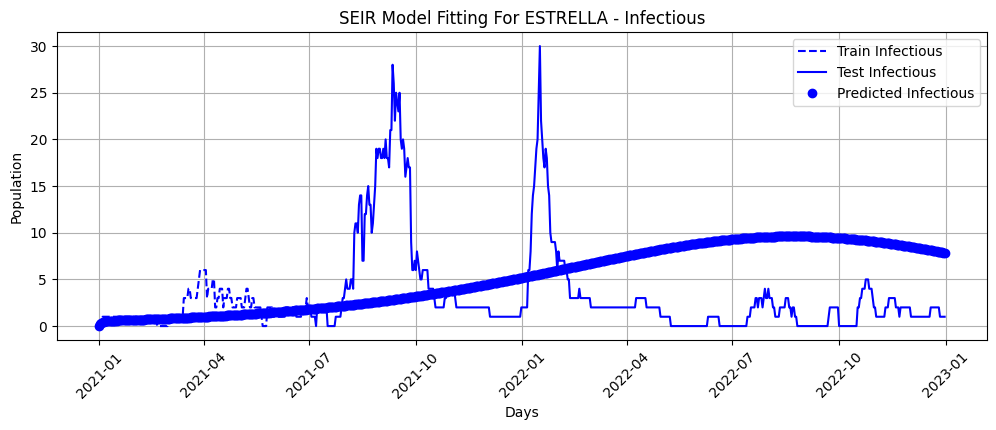

beta: 0.26502132094004904 
sigma: 0.181589224130292 
gamma: 0.24763086221251518 
r2: -0.036499237182931354 
mae: 6.623396869102793 
rmse: 11.86450533388617


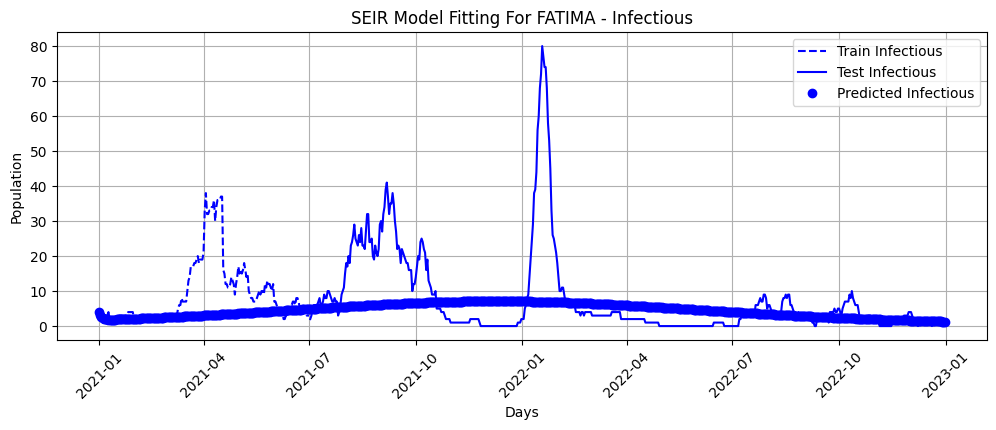

beta: 0.24487562898239246 
sigma: 0.11405272850638538 
gamma: 0.22457904040133436 
r2: -0.0924844064569359 
mae: 2.70902818950199 
rmse: 4.04474057396693


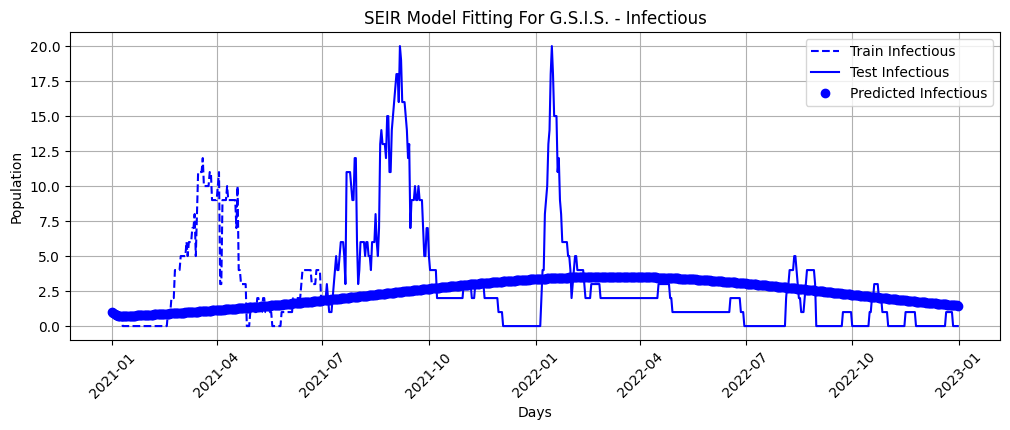

beta: 0.24976250323253527 
sigma: 0.21583096816262531 
gamma: 0.22306674811484442 
r2: -1.6280805479322344 
mae: 30.115203000142813 
rmse: 40.56321549728769


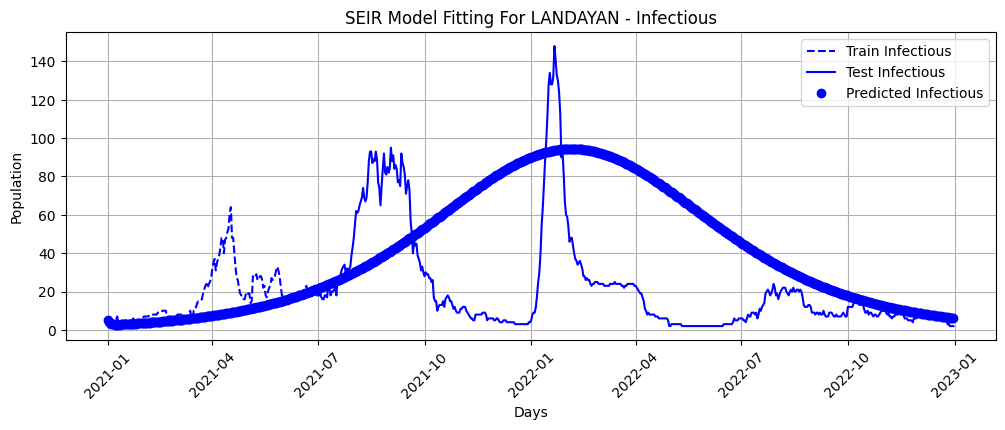

beta: 0.24888631753083565 
sigma: 0.16545187646907428 
gamma: 0.21667830834948795 
r2: -4.127389968282601 
mae: 38.619873053922774 
rmse: 52.13184750453335


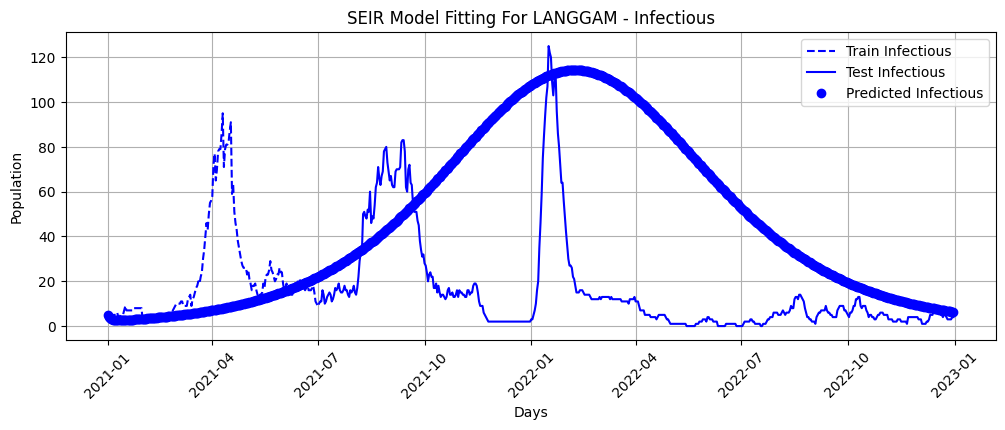

beta: 0.17068392276522065 
sigma: 0.22593403232278172 
gamma: 0.14902794719593918 
r2: -15.306335992859172 
mae: 12.44547072815026 
rmse: 16.224556093694623


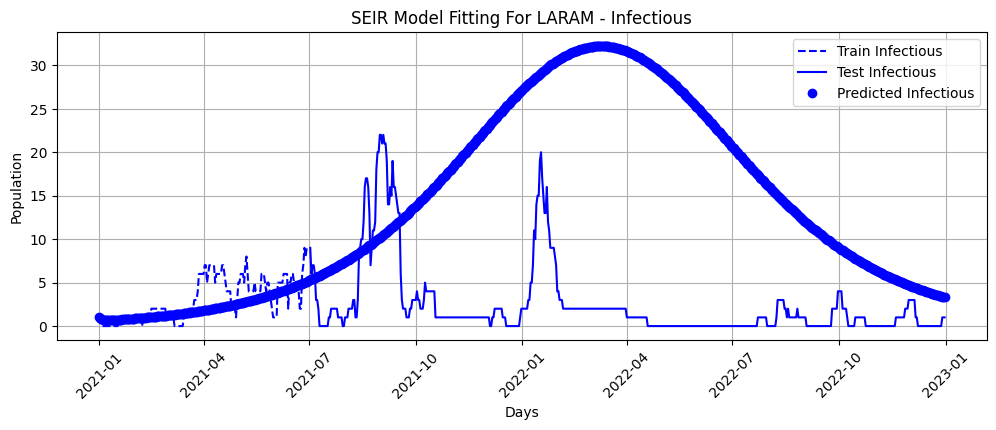

beta: 0.28564793975686015 
sigma: 0.0766856628074553 
gamma: 0.2609098978466107 
r2: -0.5717342169196844 
mae: 8.357921842709546 
rmse: 10.677792319054522


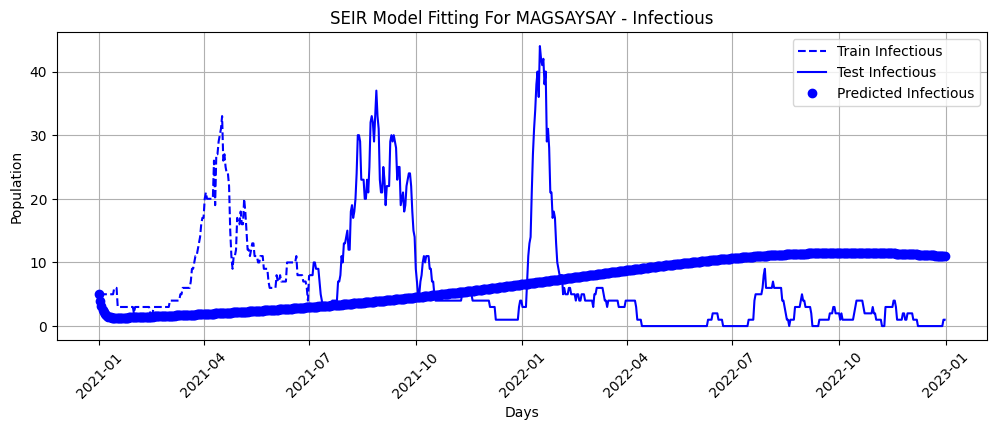

beta: 0.39797768192037564 
sigma: 0.11598910617244593 
gamma: 0.3481978523479709 
r2: -0.0025629596709739744 
mae: 5.761304194069709 
rmse: 8.676517393986373


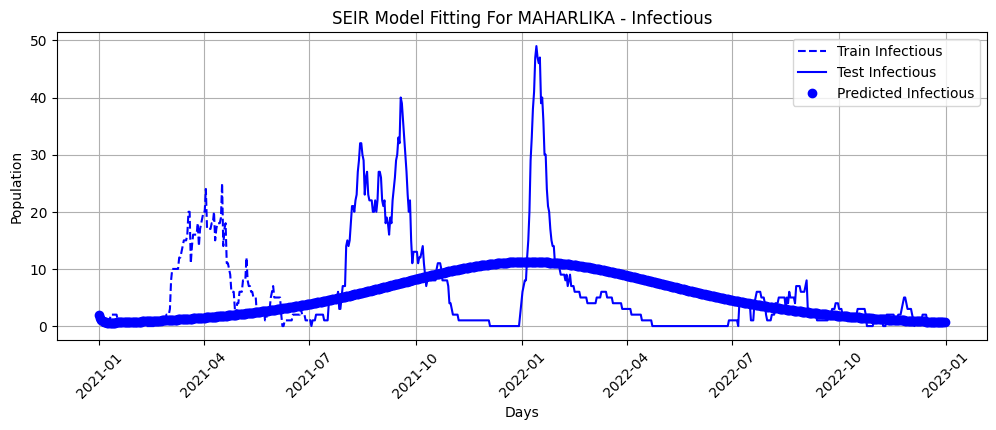

beta: 0.3 
sigma: 0.2 
gamma: 0.1 
r2: -0.5293588139722891 
mae: 1.6287671232876713 
rmse: 2.7684623099554444


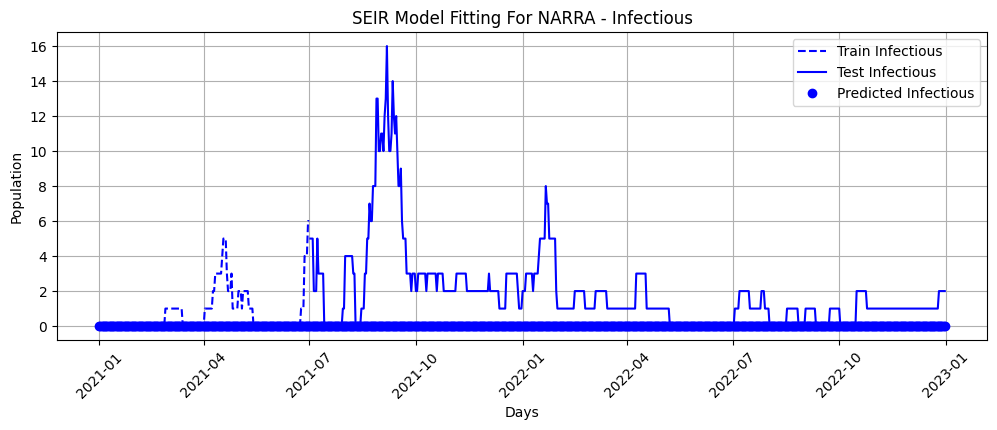

beta: 0.0757642238840998 
sigma: 0.168162423272522 
gamma: 0.07224043974408495 
r2: -0.02405922750004752 
mae: 5.45126220730526 
rmse: 6.776178444211436


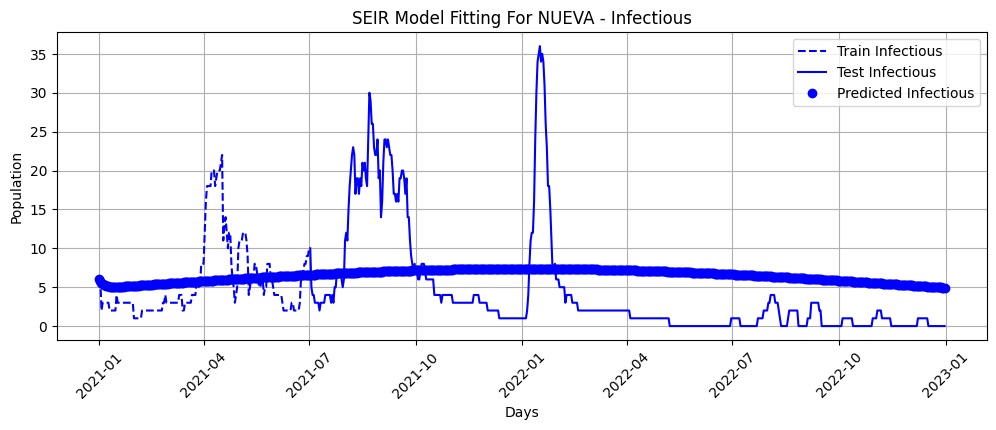

beta: 0.1930762186206792 
sigma: 0.1805611505978116 
gamma: 0.16710265973426236 
r2: -1.4546818444514087 
mae: 32.27346624081887 
rmse: 45.58900933598958


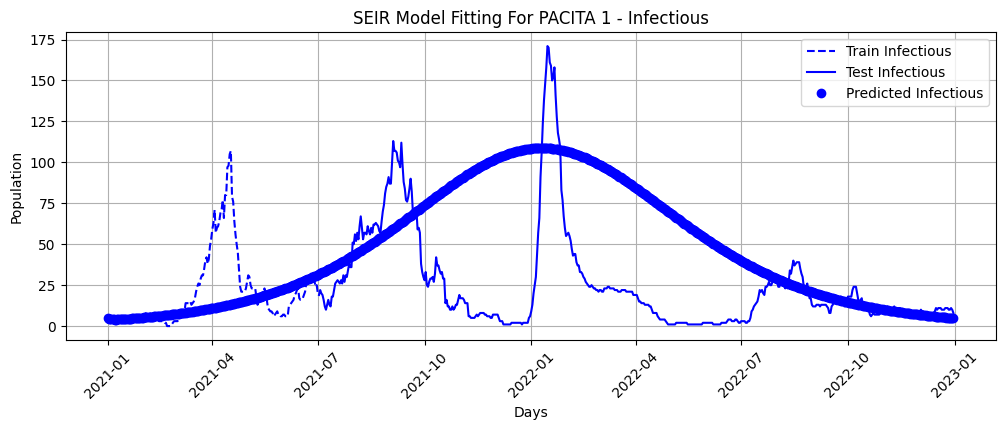

beta: 0.17938372594046642 
sigma: 0.09462177332215242 
gamma: 0.1453815126658496 
r2: -5.033056786845146 
mae: 29.350300913361256 
rmse: 39.82181689105227


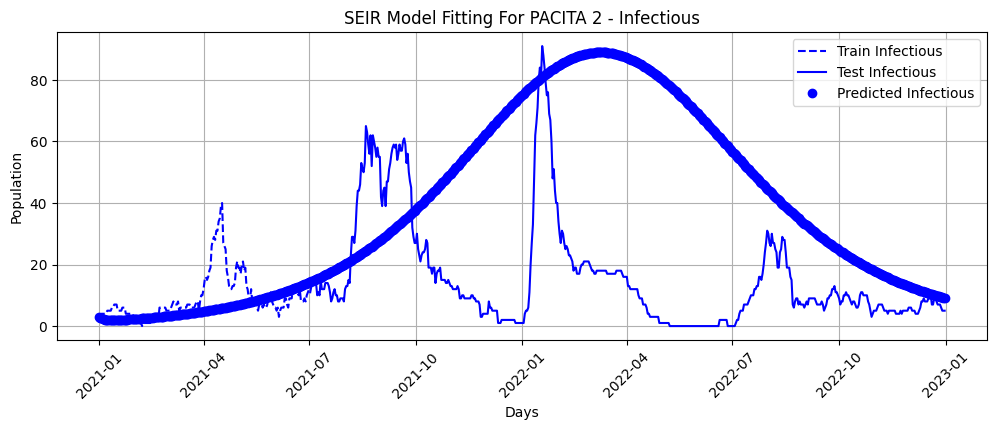

beta: 0.2599162541796216 
sigma: 0.1280583370843937 
gamma: 0.243299328994426 
r2: -0.18003806140813317 
mae: 4.3089760273761195 
rmse: 7.176959042505711


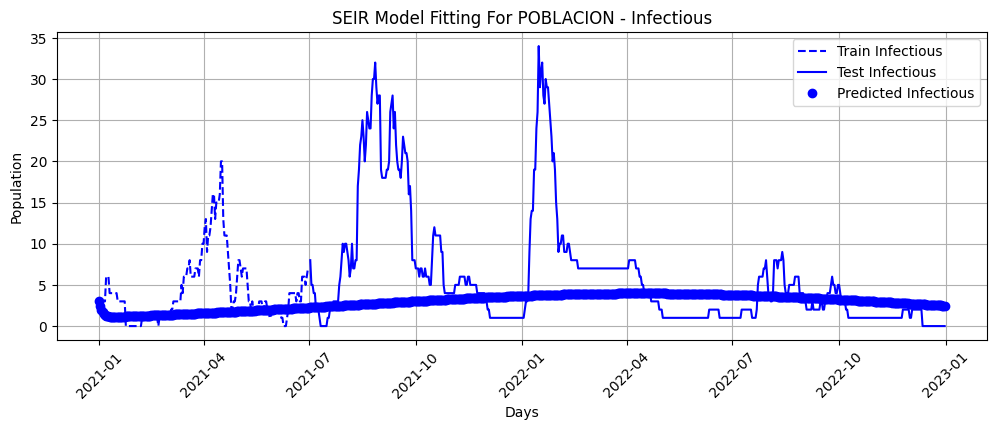

beta: 0.22726003908558817 
sigma: 0.2833437489658741 
gamma: 0.21483262511234869 
r2: -0.21233092269295661 
mae: 1.7554341268776101 
rmse: 2.1211353276314986


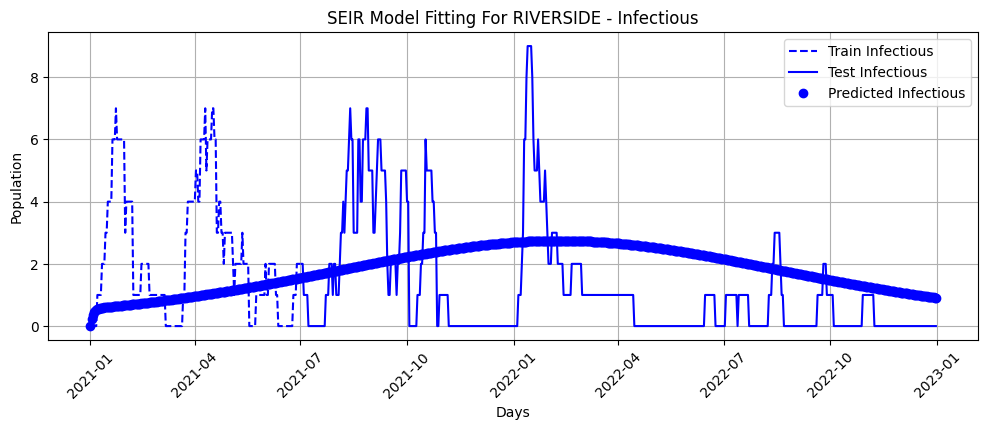

beta: 0.3 
sigma: 0.2 
gamma: 0.1 
r2: -0.4704407379633122 
mae: 6.894520547945206 
rmse: 12.189204745542964


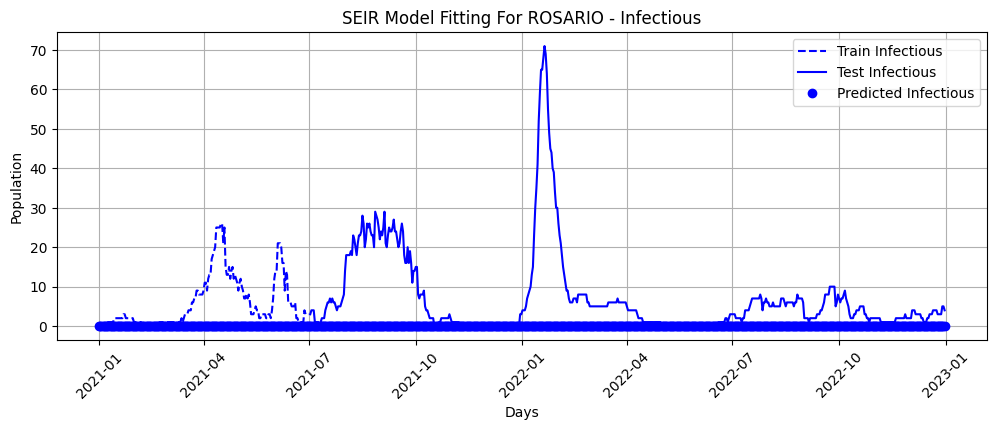

beta: 0.16137418000351722 
sigma: 0.3262391661451004 
gamma: 0.14544849250645797 
r2: -0.3644187100550038 
mae: 6.428948061639857 
rmse: 8.656316153038809


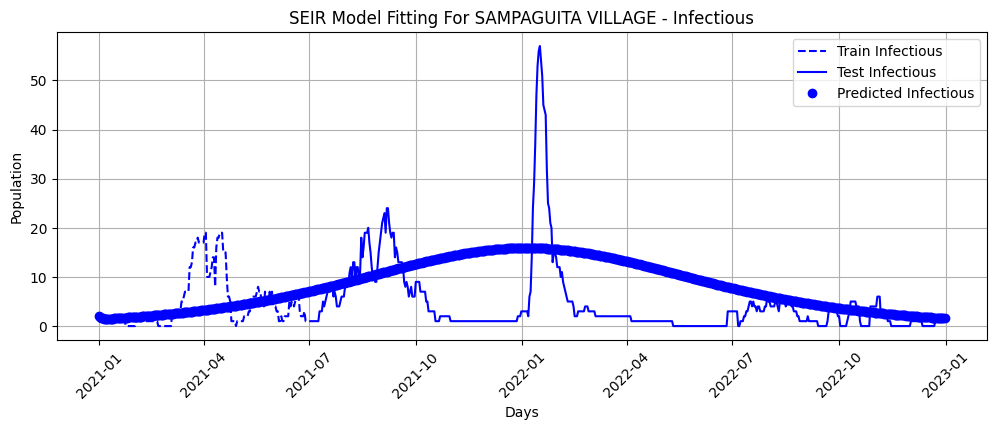

beta: 0.2559176098434183 
sigma: 0.19440765118260597 
gamma: 0.2309523423399255 
r2: -0.12374906493174587 
mae: 47.35358562476575 
rmse: 68.51236664265542


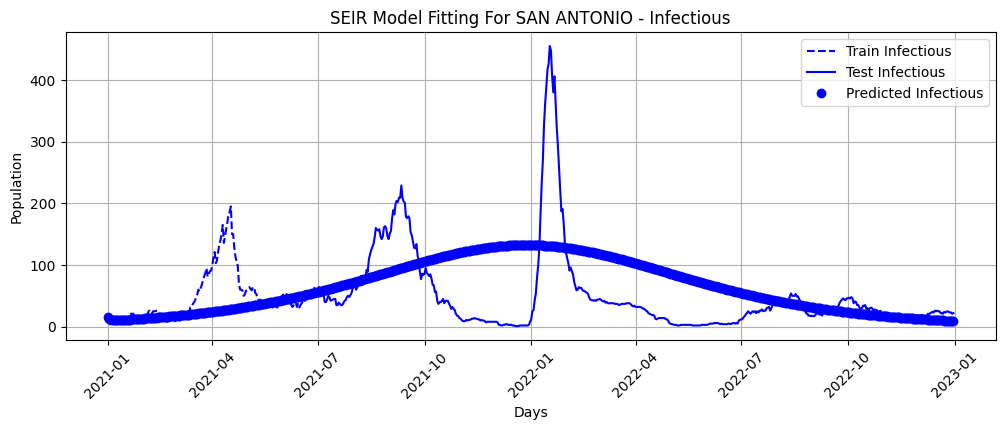

beta: 0.19831307508065293 
sigma: 0.1871605297613468 
gamma: 0.17838822183113107 
r2: -0.6664439181374451 
mae: 7.27536366914057 
rmse: 9.249034838585464


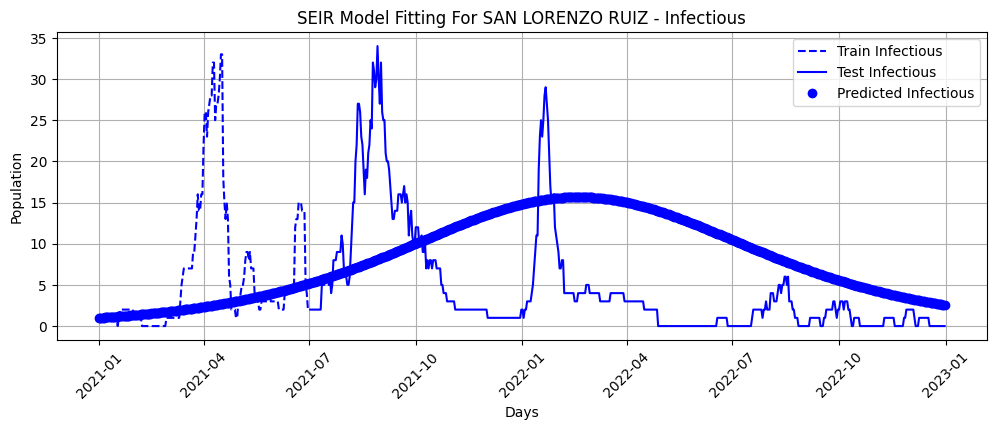

beta: 0.21623224641095254 
sigma: 0.1561421836340558 
gamma: 0.19102884153947938 
r2: -3.174049564413105 
mae: 8.386646117595594 
rmse: 10.525192020807706


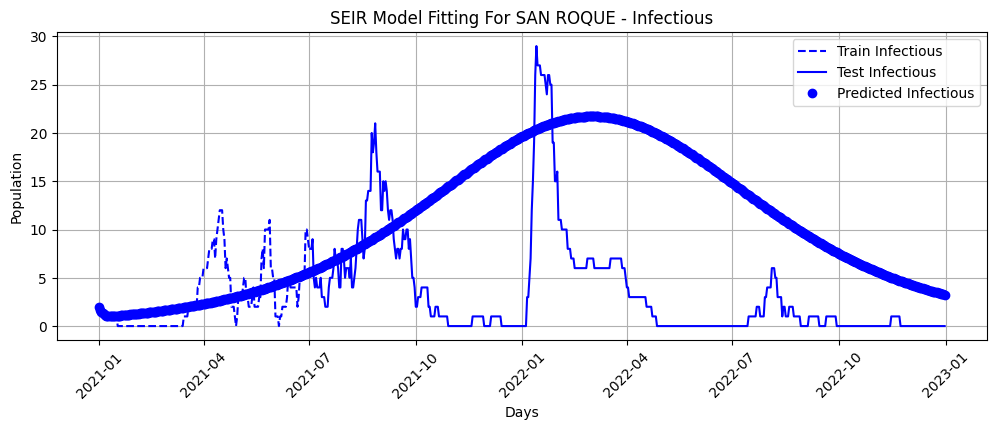

beta: 0.294287990365009 
sigma: 0.09446125159398908 
gamma: 0.2726830128492766 
r2: -0.1426652552480956 
mae: 30.401939426705443 
rmse: 60.05444248816572


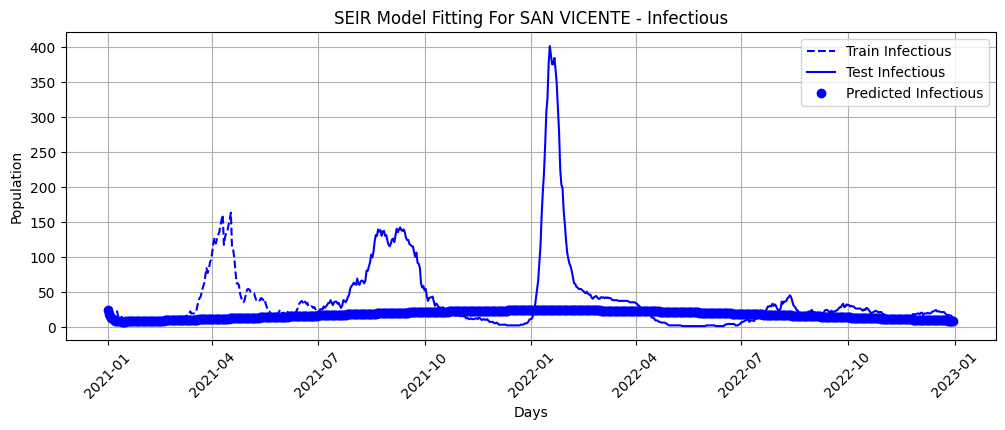

Error processing SANTO NINO: 'SANTO NINO'
beta: 0.24634184392788874 
sigma: 0.31546199055996044 
gamma: 0.2247316544664171 
r2: -0.7821970433447607 
mae: 4.977396905063408 
rmse: 6.063004725194637


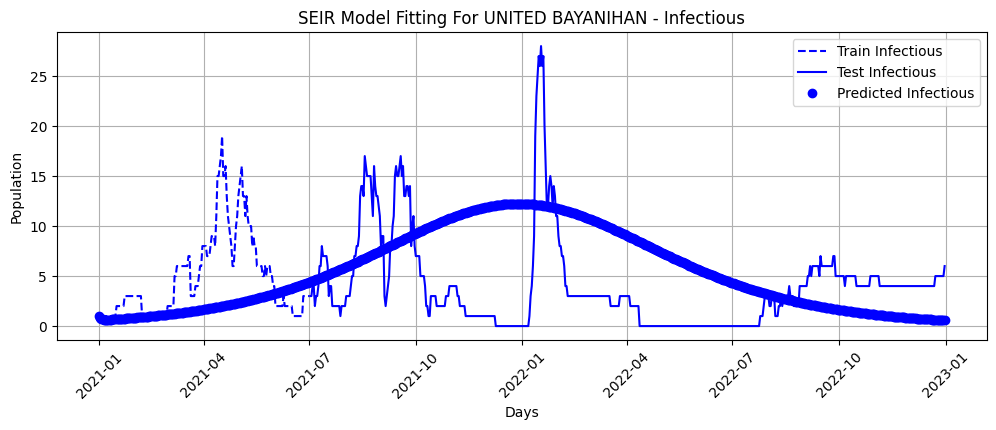

beta: 0.10480080390974987 
sigma: 0.5900756397665237 
gamma: 0.10673116135407097 
r2: -0.08945488137425972 
mae: 3.1639386776955214 
rmse: 5.019696164787803


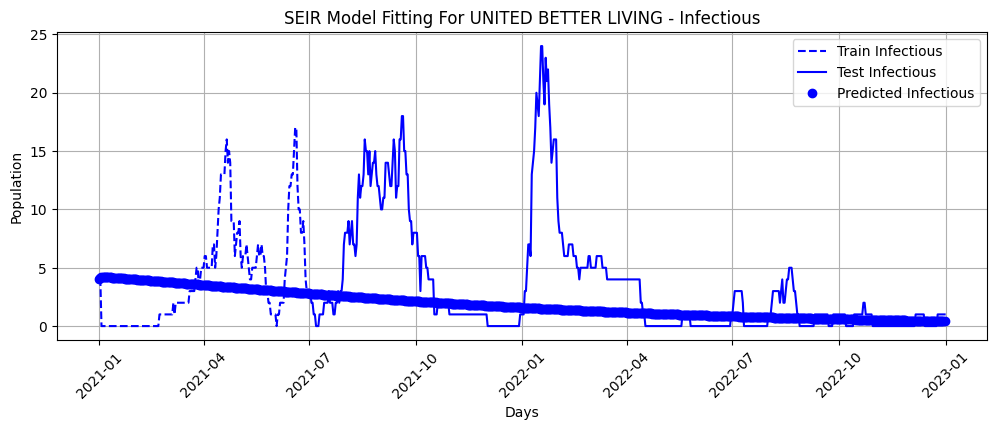

In [20]:
df_observed_data = main_df[(main_df['date'] >= '01/01/2021') & (main_df['date'] <= '12/31/2022')]

for brgy_name, brgy_pop in barangay_population_dict.items():
    brgy_data = df_observed_data[df_observed_data["barangay_Res"] == brgy_name]
    
    if brgy_data.empty:
        print(f"Skipping {brgy_name}: No data available.")
        continue        

    # only for plotting
    brgy_train_data = brgy_data[(brgy_data['date'] >= '01/01/2021') & (brgy_data['date'] <= '07/01/2021')]
    brgy_test_data = brgy_data[(brgy_data['date'] >= '07/02/2021') & (brgy_data['date'] <= '12/31/2022')]

    brgy_data = brgy_data.sort_values(by="date")
    observed_data = brgy_data[["count_Exposed", "count_Infectious", "count_Recovered"]]
    
    N = brgy_pop
    E0 = observed_data['count_Exposed'].iloc[0] # Initial exposed cases
    I0 = observed_data['count_Infectious'].iloc[0] # Initial infected from data
    R0 = observed_data['count_Recovered'].iloc[0] # Initial recovered
    S0 = N - E0 - I0 - R0  # Susceptible

    initial_conditions: tuple = [S0, E0, I0, R0]
    time_points = np.arange(observed_data.shape[0]) # odeint expects an array (vector) of integers.
    
    try:
        o_beta, o_sigma, o_gamma = params_dict[brgy_name]['beta'], params_dict[brgy_name]['sigma'], params_dict[brgy_name]['gamma'] # from best params
    
    except Exception as e:
        print(f"Error processing {brgy_name}: {e}")
        continue
    
    s, e, i, r = simulate_seir(o_beta, o_sigma, o_gamma, initial_conditions, time_points, N)
    
    # for plotting observed data
    plot_actual = pd.DataFrame({
        'date_train': brgy_train_data['date'],
        'date_test': brgy_test_data['date'],
        'train_infectious': brgy_train_data['count_Infectious'],
        'test_infectious': brgy_test_data['count_Infectious'],
    })
    
    plot_prediction = pd.DataFrame({
    'date': brgy_data['date'],
    'S': s,
    'E': e,
    'I': i,
    'R': r
    })
    
    # Infectious
    r2_infectious = r2_score(brgy_data['count_Infectious'], i)
    mae_infectious = mean_absolute_error(brgy_data['count_Infectious'], i)
    rmse_infectious = np.sqrt(mean_squared_error(brgy_data['count_Infectious'], i))
    print(f"beta: {o_beta} \nsigma: {o_sigma} \ngamma: {o_gamma} \nr2: {r2_infectious} \nmae: {mae_infectious} \nrmse: {rmse_infectious}")
    
    plt.figure(figsize=(12, 4))
    plt.plot(plot_actual['date_train'], plot_actual['train_infectious'], 'b--', label='Train Infectious')
    plt.plot(plot_actual['date_test'], plot_actual['test_infectious'], 'b-', label='Test Infectious')
    plt.plot(plot_prediction['date'], plot_prediction['I'], 'bo', label='Predicted Infectious')
    plt.xlabel('Days')
    plt.ylabel('Population')
    plt.legend()
    plt.xticks(rotation=45)
    plt.title(f'SEIR Model Fitting For {brgy_name} - Infectious')
    plt.grid(True)
    plt.show()